In [7]:
#pip install seaborn

In [8]:
#pip install urllib3

In [9]:
#pip install requests

In [10]:
#pip install yfinance

In [11]:
#pip install pystan

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re

# import nltk
# from nltk.corpus import stopwords
# from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller




In [13]:
from  prophet import Prophet

In [14]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [15]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [16]:
sp500=yf.Ticker("^GSPC")

In [17]:
GTHX=yf.Ticker("GTHX")

In [18]:
sp500.get_news()

[{'uuid': 'bb7f10db-23fe-3f01-84ca-f67d3d868370',
  'title': 'Labcorp reports 20% drop in COVID test sales in Q4',
  'publisher': 'MarketWatch',
  'link': 'https://finance.yahoo.com/m/bb7f10db-23fe-3f01-84ca-f67d3d868370/labcorp-reports-20%25-drop-in.html',
  'providerPublishTime': 1676559360,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/S8SCotpO9m2XQyQUIGU5dw--~B/aD02MzA7dz0xMjAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/96d076434b2a015a3010bd2787b8c856',
     'width': 1200,
     'height': 630,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/FUOaXzXTWeRpF8AHxhm.PQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/marketwatch.com/96d076434b2a015a3010bd2787b8c856',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['LH', '^GSPC']},
 {'uuid': '7cc32ef2-db35-3f8a-961a-64115abb7ae2',
  'title': 'Stocks open lower amid economi

In [19]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)

In [20]:
index_price_13m=sp500.history(start="2022-01-01", end="2023-01-31",)
index_price_13m.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)
index_price_13m=index_price_13m.tz_localize(None)

In [21]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [22]:
index_price=index_price.tz_localize(None)

In [23]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [24]:
#index=pd.read_csv

In [25]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [26]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [27]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [28]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

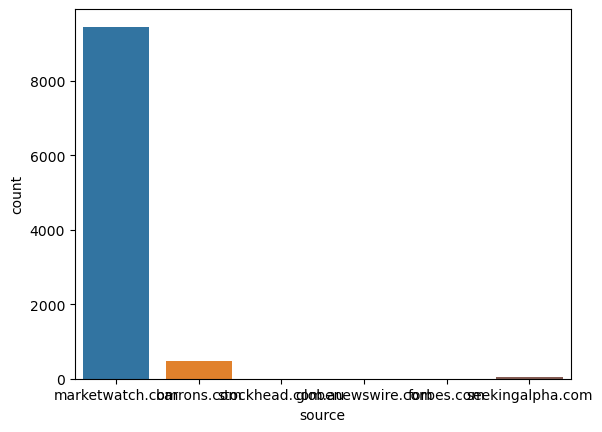

In [29]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [30]:
tokens=tokenizer.encode("wells fargo maintains overweight on agilent technologies raises price target to 95.",return_tensors="pt")
tokens

tensor([[  101,  7051, 23054,  9319,  2058, 11179,  2006, 29003,  3372,  6786,
         13275,  3976,  4539,  2000,  5345,  1012,   102]])

In [31]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [32]:
result.logits

tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>)

In [33]:

(torch.argmax(result.logits))+1


tensor(1)

                                                Apllying Model on tittles

In [34]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [35]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [36]:

#news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [37]:
#news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [38]:
#news["sentiment_description"]=news["description"].apply(lambda x:sentiment_score(x[:512]))

In [39]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [40]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [41]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_10101/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [42]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [43]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   title                  20000 non-null  object 
 2   url                    20000 non-null  object 
 3   description            20000 non-null  object 
 4   source                 20000 non-null  object 
 5   tickers                20000 non-null  object 
 6   tags                   20000 non-null  object 
 7   published_at           20000 non-null  object 
 8   sentiment_title        20000 non-null  int64  
 9   sentiment_description  10000 non-null  float64
 10  date                   20000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [44]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [45]:
news.reset_index(inplace=True)

In [46]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

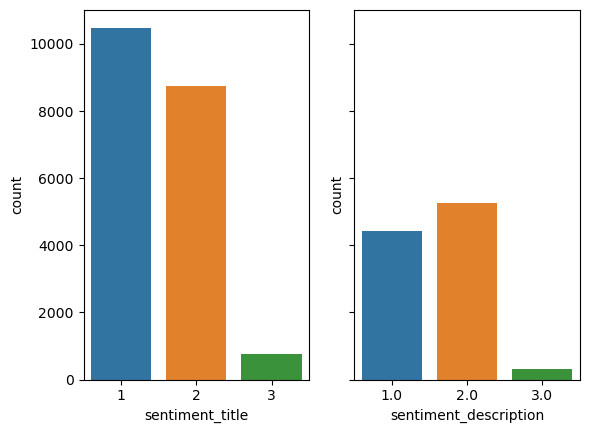

In [47]:
n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey)
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [48]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [49]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [50]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

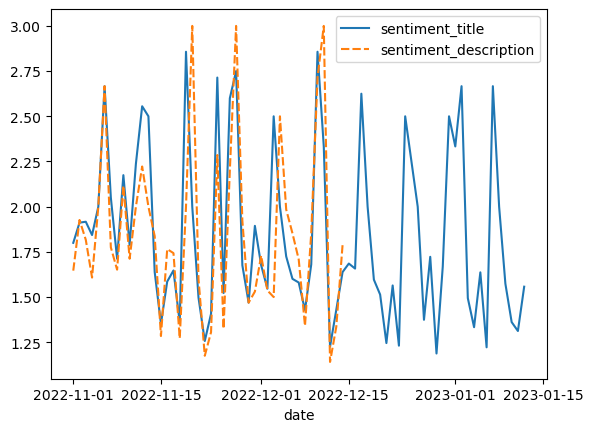

In [51]:
sns.lineplot(data=grouped_news)

In [52]:
index_price.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,4303360000


In [53]:
full_data=index_price.join(grouped_news, how="left")

In [54]:
full_data.drop(labels="sentiment_description",axis=1,inplace=True)

In [55]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             49 non-null     float64
 1   High             49 non-null     float64
 2   Low              49 non-null     float64
 3   Close            49 non-null     float64
 4   Volume           49 non-null     int64  
 5   sentiment_title  49 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


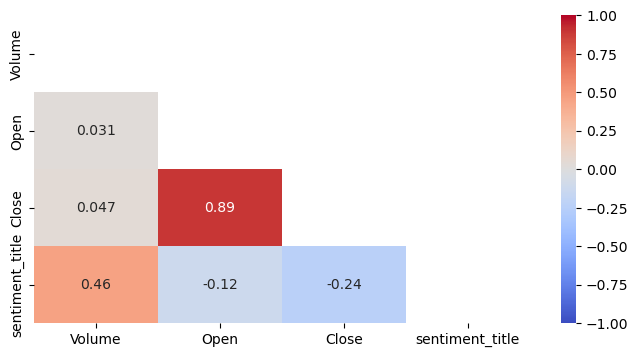

In [56]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

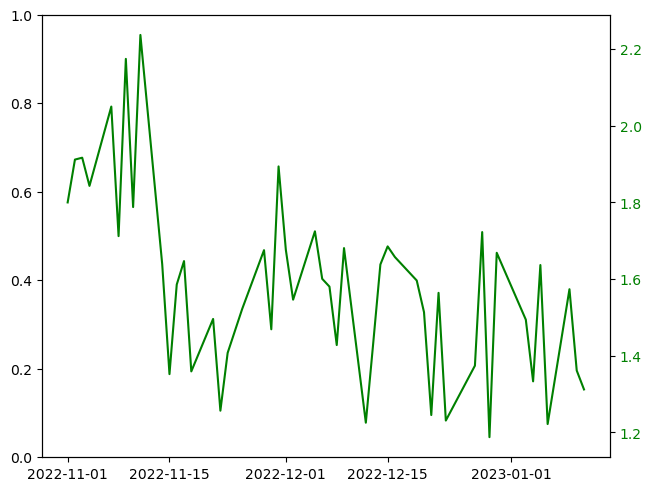

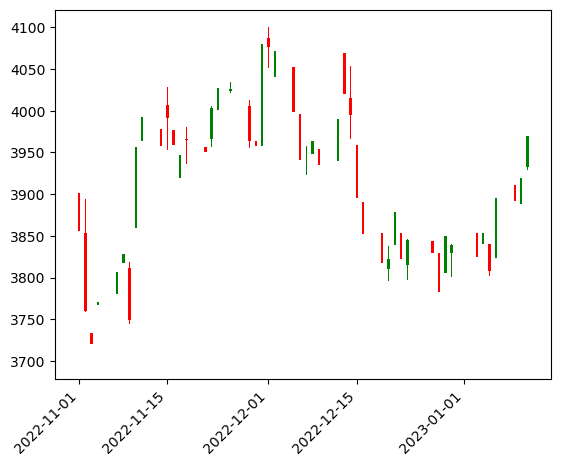

In [57]:

fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")




ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

<AxesSubplot:xlabel='Close', ylabel='sentiment_title'>

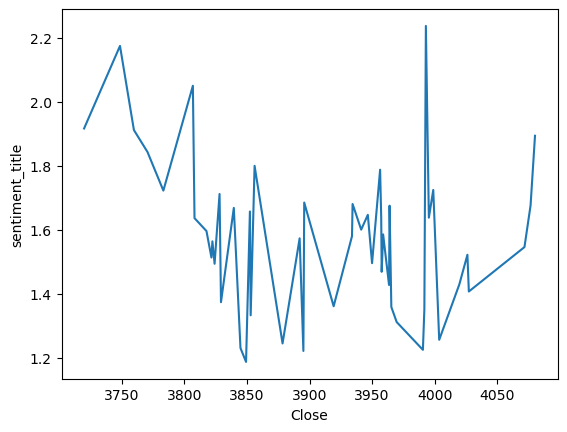

In [58]:
sns.lineplot(data=full_data, x="Close",y="sentiment_title")


                                                                                        Time series 

<AxesSubplot:xlabel='Date'>

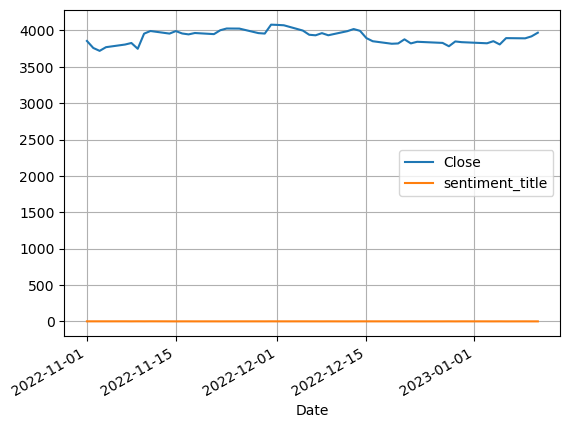

In [59]:
full_data[["Close","sentiment_title"]].plot(grid="on")

In [60]:
#Augmented Dickey Fuller Test (ADF Test) - non-stationary



# ADF Test
result = adfuller(full_data["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.158002571112376
n_lags: 0.22183948229034844
p-value: 0.22183948229034844
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777


In [61]:
# ADF Test non-stationary
result = adfuller(index_price_13m["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.652761382221548
n_lags: 0.08257533145900703
p-value: 0.08257533145900703
Critial Values:
   1%, -3.4548957220044336
Critial Values:
   5%, -2.8723451788613157
Critial Values:
   10%, -2.572527778361272


<AxesSubplot:xlabel='Date'>

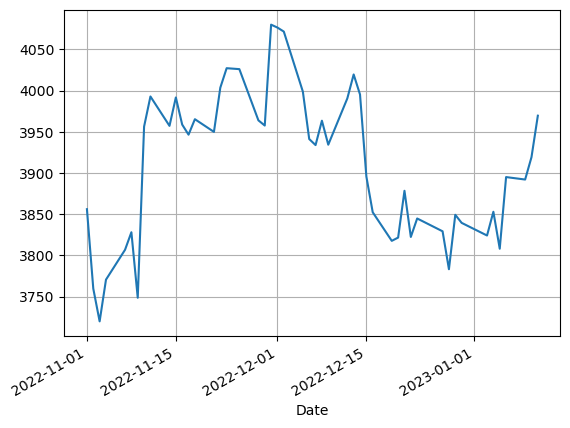

In [62]:
full_data["Close"].plot(grid="on")

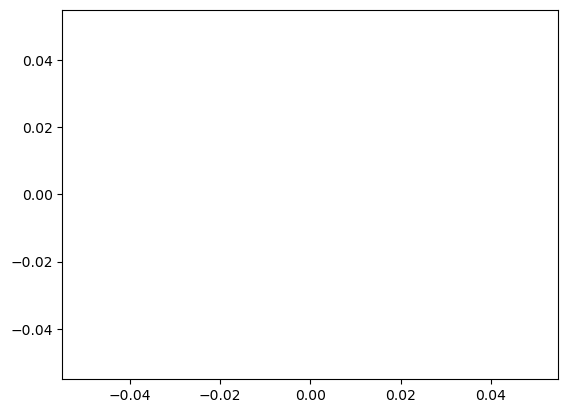

In [63]:
mean=full_data
mean=plt.plot()

<AxesSubplot:xlabel='Date'>

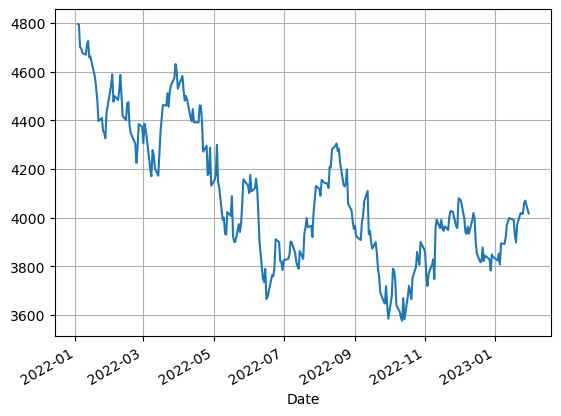

In [64]:
index_price_13m["Close"].plot(grid="on")

                                                                                                 Full data set 

In [65]:
df_news_prices=news.loc[:,["date","sentiment_title","sentiment_description"]].set_index("date").join(index_price)

In [66]:
df_news_prices.dropna(axis=0,inplace=True)

In [67]:
df_news_prices.tail(1)

,sentiment_title,sentiment_description,Open,High,Low,Close,Volume
2022-12-14,2,2.0,4015.540039,4053.76001,3965.649902,3995.320068,4.472340e+09


In [68]:
df_news_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9940 entries, 2022-11-01 to 2022-12-14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiment_title        9940 non-null   int64  
 1   sentiment_description  9940 non-null   float64
 2   Open                   9940 non-null   float64
 3   High                   9940 non-null   float64
 4   Low                    9940 non-null   float64
 5   Close                  9940 non-null   float64
 6   Volume                 9940 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 621.2 KB


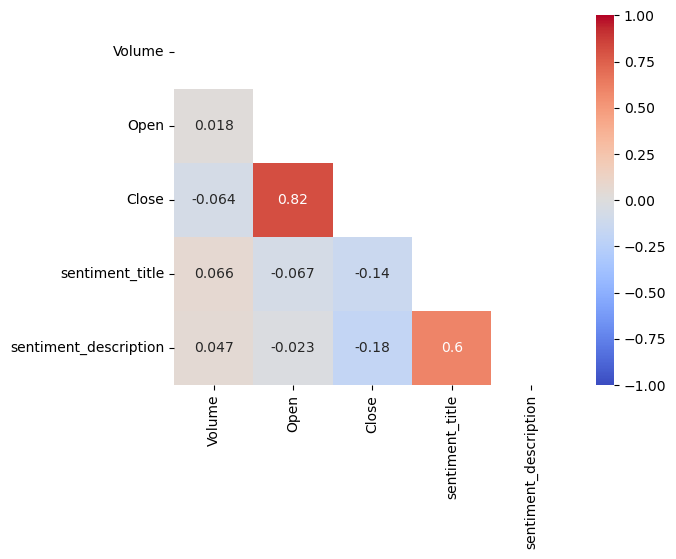

In [69]:
#Correlation matrix

fig,axs=plt.subplots()

corr_data=df_news_prices[["Volume","Open","Close","sentiment_title","sentiment_description"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

                                                                                            FB Prophet 

In [103]:
# Training model 

df_close=full_data.drop(["sentiment_title","Open","High","Low","Volume"],axis=1)
df_score=full_data.drop(["Close","Open","High","Low","Volume"],axis=1)


In [104]:
df_close.reset_index(inplace=True)



In [106]:
df_close = df_close.rename(columns = {'Date':'ds',"Close":"y"})

In [108]:
m=Prophet(interval_width=0.95)
model=m.fit(df_close)


16:23:19 - cmdstanpy - INFO - Chain [1] start processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


16:23:19 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
#Forecast
future=m.make_future_dataframe(periods=50,freq="D")
forecest_close=m.predict(future)

In [114]:
forecest_close.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3676.749061,3859.810875,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3687.544067,3875.565873,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3700.744881,3883.302835,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3728.414969,3907.766548,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3737.879514,3921.432678,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764


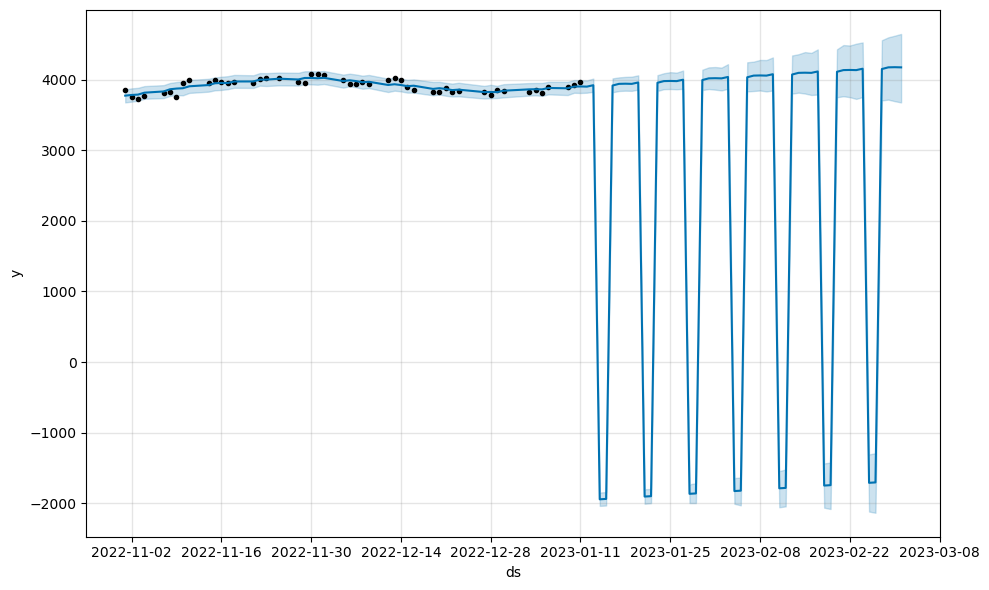

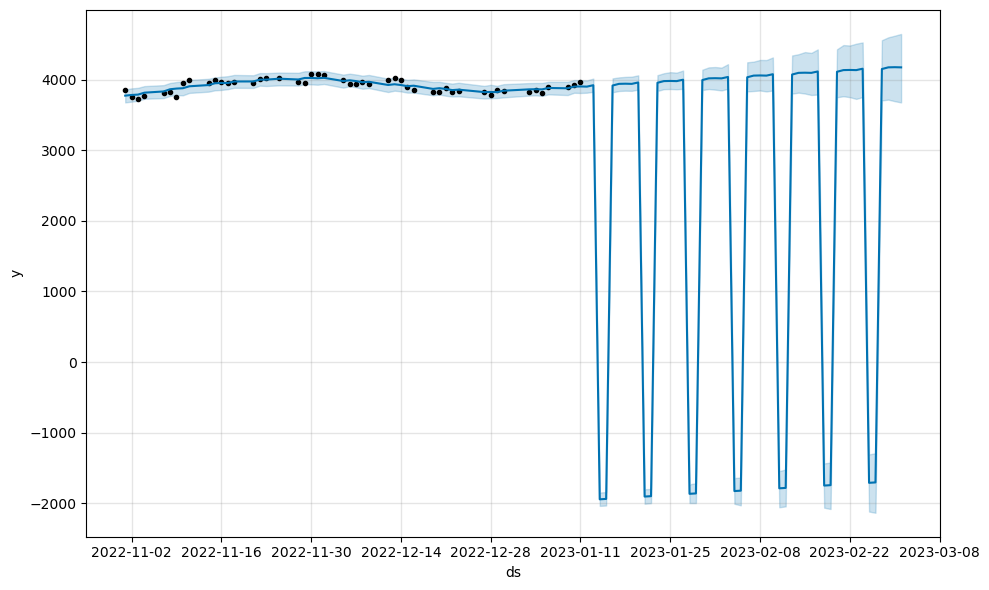

In [116]:
m.plot(forecest_close)

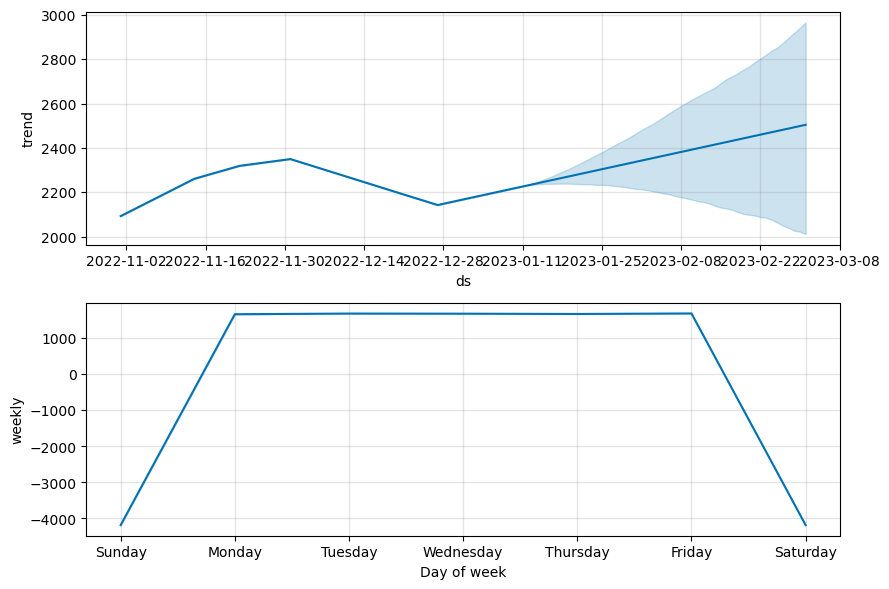

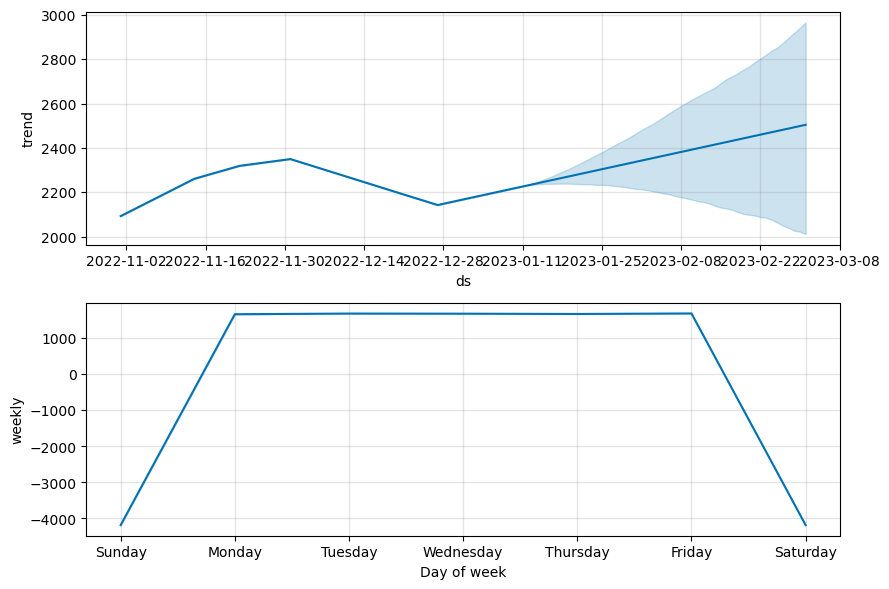

In [117]:
m.plot_components(forecest_close)